In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
df=pd.read_excel(r"C:\Users\PC\Downloads\Adidas US Sales Datasets.xlsx")

In [25]:
df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,NaN,NaN,Adidas Sales Database,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
4,NaN,Foot Locker,1185732,2020-01-01 00:00:00,Northeast,New York,New York,Men's Street Footwear,50,1200,600000,300000,0.5,In-store


In [26]:
df = df.drop('Unnamed: 0',axis=1)

In [27]:
df = df.drop(labels=[0,1,2], axis=0)

In [28]:
df.columns = df.iloc[0]

In [29]:
df = df.drop(labels=3, axis=0)

In [30]:
df = df.reset_index(drop=True)

In [31]:
df.head()

3,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,2020-01-01 00:00:00,Northeast,New York,New York,Men's Street Footwear,50,1200,600000,300000,0.5,In-store
1,Foot Locker,1185732,2020-01-02 00:00:00,Northeast,New York,New York,Men's Athletic Footwear,50,1000,500000,150000,0.3,In-store
2,Foot Locker,1185732,2020-01-03 00:00:00,Northeast,New York,New York,Women's Street Footwear,40,1000,400000,140000,0.35,In-store
3,Foot Locker,1185732,2020-01-04 00:00:00,Northeast,New York,New York,Women's Athletic Footwear,45,850,382500,133875,0.35,In-store
4,Foot Locker,1185732,2020-01-05 00:00:00,Northeast,New York,New York,Men's Apparel,60,900,540000,162000,0.3,In-store


In [32]:
df.describe()

3,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
count,9648,9648,9648,9648,9648,9648,9648,9648.0,9648,9648.0,9648.0,9648.00,9648
unique,6,4,724,5,50,52,6,146.0,361,3512.0,6510.0,127.00,3
top,Foot Locker,1185732,2021-01-17 00:00:00,West,California,Portland,Men's Street Footwear,50.0,225,100000.0,21000.0,0.35,Online
freq,2637,5265,77,2448,432,360,1610,557.0,207,52.0,34.0,1229.00,4889


In [33]:
df.dtypes

3
Retailer            object
Retailer ID         object
Invoice Date        object
Region              object
State               object
City                object
Product             object
Price per Unit      object
Units Sold          object
Total Sales         object
Operating Profit    object
Operating Margin    object
Sales Method        object
dtype: object

In [34]:
df = df.astype({"Price per Unit": int, "Units Sold": int,"Total Sales": int,"Operating Profit": int,"Operating Margin": float})

In [35]:
df.dtypes

3
Retailer             object
Retailer ID          object
Invoice Date         object
Region               object
State                object
City                 object
Product              object
Price per Unit        int32
Units Sold            int32
Total Sales           int32
Operating Profit      int32
Operating Margin    float64
Sales Method         object
dtype: object

In [36]:
df.head()

3,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,2020-01-01 00:00:00,Northeast,New York,New York,Men's Street Footwear,50,1200,600000,300000,0.50,In-store
1,Foot Locker,1185732,2020-01-02 00:00:00,Northeast,New York,New York,Men's Athletic Footwear,50,1000,500000,150000,0.30,In-store
2,Foot Locker,1185732,2020-01-03 00:00:00,Northeast,New York,New York,Women's Street Footwear,40,1000,400000,140000,0.35,In-store
3,Foot Locker,1185732,2020-01-04 00:00:00,Northeast,New York,New York,Women's Athletic Footwear,45,850,382500,133875,0.35,In-store
4,Foot Locker,1185732,2020-01-05 00:00:00,Northeast,New York,New York,Men's Apparel,60,900,540000,162000,0.30,In-store


In [38]:
top_products = df[['Product','Total Sales']].groupby('Product').sum()
top_products

3,Total Sales
Product,
Men's Apparel,123728529
Men's Athletic Footwear,153673673
Men's Street Footwear,208826167
Women's Apparel,179038772
Women's Athletic Footwear,106631855
Women's Street Footwear,128002797


<Axes: title={'center': 'Total sales per Product'}, xlabel='Product'>

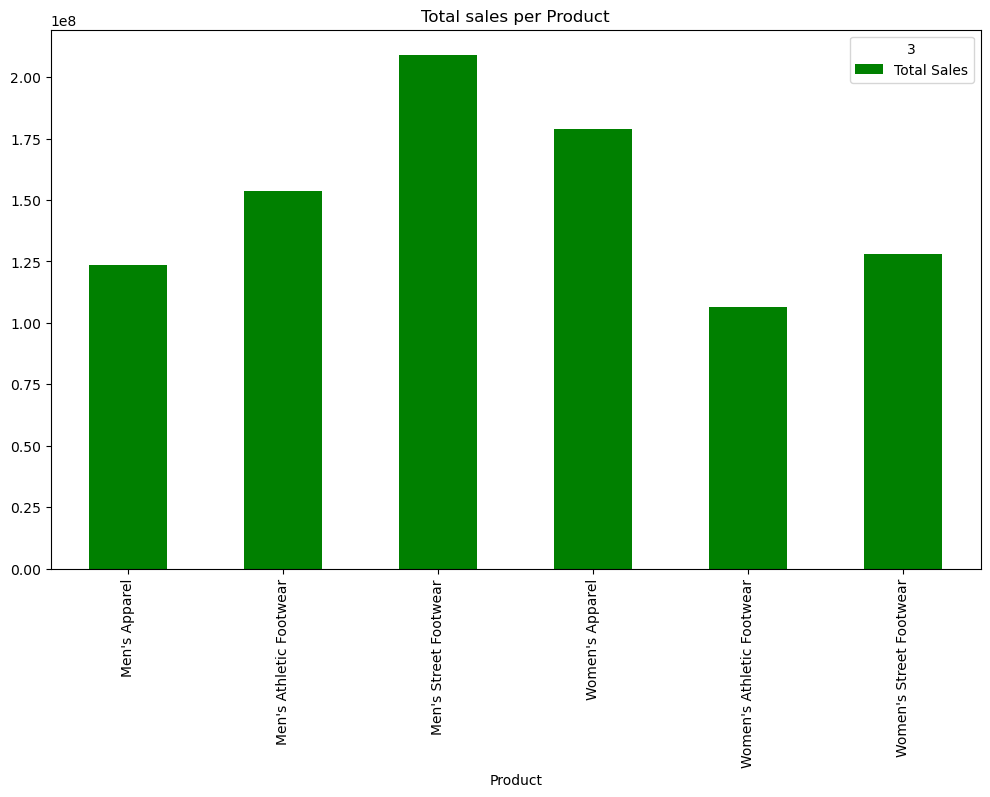

In [41]:
top_products.plot(kind='bar', figsize=(12, 7), title='Total sales per Product', color=['green'])

In [56]:
Products_Cities = df.groupby('City')['Total Sales'].sum().nlargest(10)
Products_Cities

City
Charleston       39974783
New York         39801235
San Francisco    34539220
Miami            31600863
Portland         30545637
Orlando          27682847
Seattle          26330715
Los Angeles      25634913
Houston          25456882
Albany           24427804
Name: Total Sales, dtype: int32

<Axes: title={'center': 'Top Cities'}, ylabel='City'>

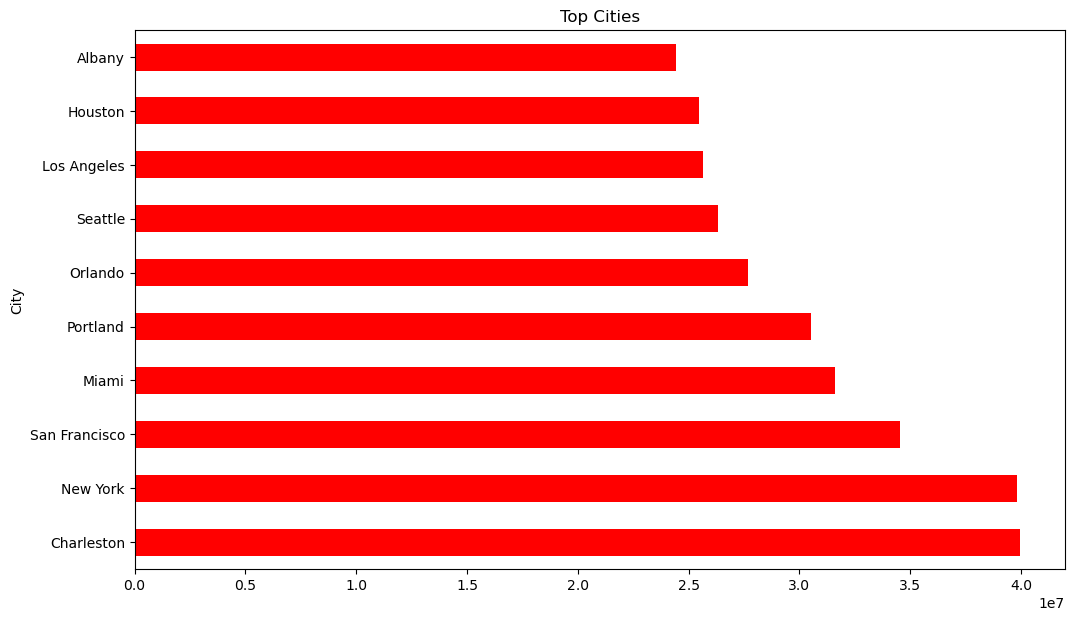

In [60]:
Products_Cities.plot(kind="barh",figsize = (12,7),title="Top Cities" ,color=['red'])

In [61]:
top_retailers= df[['Retailer','Total Sales']].groupby('Retailer').sum()
top_retailers

3,Total Sales
Retailer,
Amazon,77698884
Foot Locker,220094606
Kohl's,102114724
Sports Direct,182470917
Walmart,74558401
West Gear,242964261


array([<Axes: ylabel='Total Sales'>], dtype=object)

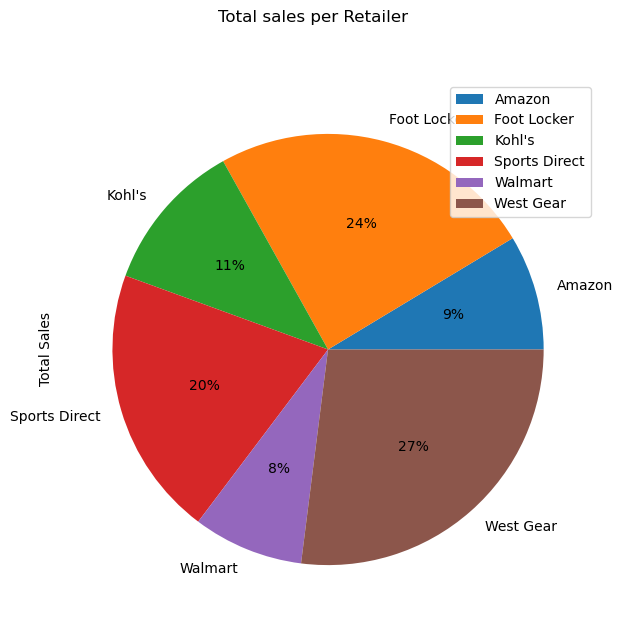

In [62]:
top_retailers.plot(kind='pie',subplots=True,figsize=(12,7),title='Total sales per Retailer',autopct='%1.0f%%')

In [64]:
ProductProfit = df[['Product','Operating Profit']].groupby('Product').sum()
ProductProfit

3,Operating Profit
Product,
Men's Apparel,44762447
Men's Athletic Footwear,51846374
Men's Street Footwear,82801715
Women's Apparel,68650450
Women's Athletic Footwear,38975265
Women's Street Footwear,45095297


array([<Axes: ylabel='Operating Profit'>], dtype=object)

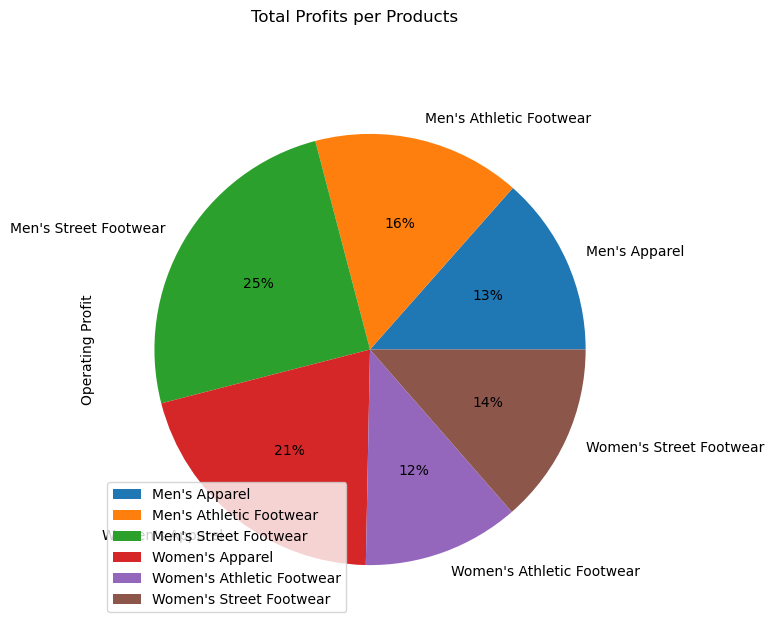

In [65]:
ProductProfit.plot(kind='pie',subplots=True,figsize=(12,7),title='Total Profits per Products',autopct='%1.0f%%')

In [66]:
SalesMethodProfit = df[['Sales Method','Operating Profit']].groupby('Sales Method').sum()
SalesMethodProfit

3,Operating Profit
Sales Method,
In-store,127590973
Online,96553370
Outlet,107987205


array([<Axes: ylabel='Operating Profit'>], dtype=object)

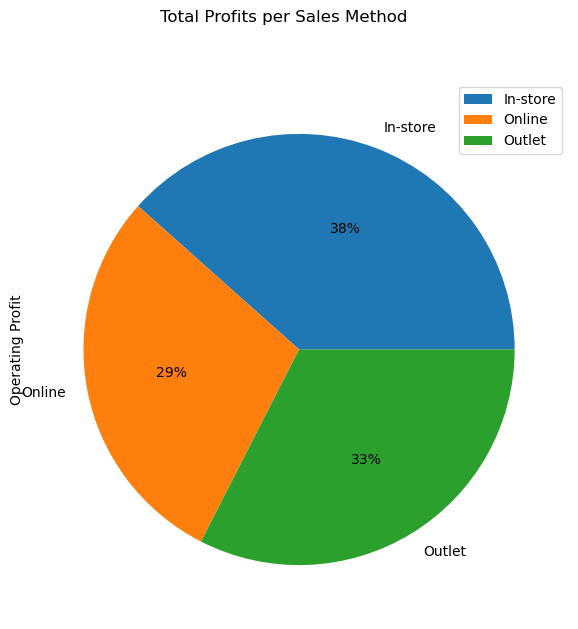

In [68]:
SalesMethodProfit.plot(kind='pie',subplots=True,figsize=(12,7),title='Total Profits per Sales Method',autopct='%1.0f%%')